<a href="https://colab.research.google.com/github/plaban1981/Mitra_AI/blob/main/Week_2_mini_project_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! nvidia-smi

Wed Jul 26 12:58:27 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Project Overview

For this week, your project will be to build a Convolutional Neural Network (CNN) to classify images from the CIFAR-10 dataset. The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class. The classes include objects like cars, birds, cats, ships, etc. Your task is to build a CNN that can accurately classify these images.

#### Skills You Will Learn and Practice

This project will give you hands-on experience with several important concepts in computer vision and deep learning:

* Image Preprocessing: You'll learn how to preprocess images for machine learning, including resizing images, normalizing pixel values, and converting labels to one-hot vectors.
* Convolutional Neural Networks (CNNs): You'll learn about CNNs, which are a type of deep learning model that are especially good at processing images.
* Training Deep Learning Models: You'll learn how to train a CNN using techniques like stochastic gradient descent and backpropagation.
* Model Evaluation: You'll learn how to evaluate your model's performance, understand confusion matrices, and compute metrics like accuracy.
####Submission

Once you've built and trained your model, you will test it on the CIFAR-10 test set to see how well it can classify new images. This will give you a sense of how well your model generalizes, which is a key aspect of machine learning.

This project will be a bit more challenging than the last one, but I'm confident that you're all up to the task. As always, please don't hesitate to reach out if you have any questions or need any help.

## Dataset Description
The CIFAR-10 data consists of 60,000 32x32 color images in 10 classes, with 6000 images per class. There are 50,000 training images and 10,000 test images in the official data. We have preserved the train/test split from the original dataset.  The provided files are:

train.7z - a folder containing the training images in png format
test.7z - a folder containing the test images in png format
trainLabels.csv - the training labels

To discourage certain forms of cheating (such as hand labeling) we have added 290,000 junk images in the test set. These images are ignored in the scoring. We have also made trivial modifications to the official 10,000 test images to prevent looking them up by file hash. These modifications should not appreciably affect the scoring. You should predict labels for all 300,000 images.

The label classes in the dataset are:

- airplane
- automobile
- bird
- cat
- deer
- dog
- frog
- horse
- ship
- truck


The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks.

## Download Data

In [1]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.5.16-py3-none-any.whl size=110685 sha256=51676a526595519c3c756a15c3213ff46185c634f53b06a95a032eb1c4369f60
  Stored in directory: /root/.cache/pip/wheels/43/4b/fb/736478af5e8004810081a06259f9aa2f7c3329fc5d03c2c412
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.16
    Uninstalling kaggle-1.5.16:
      Successfully uninstalled kaggle-1.5.16


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"plabannayak","key":"e07977afd437047e0247b86b331025b8"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [4]:
! kaggle competitions download -c cifar-10

100% 715M/715M [00:33<00:00, 24.4MB/s]
100% 715M/715M [00:33<00:00, 22.3MB/s]


In [5]:
!unzip "/content/cifar-10.zip"

Archive:  /content/cifar-10.zip
  inflating: sampleSubmission.csv    
  inflating: test.7z                 
  inflating: train.7z                
  inflating: trainLabels.csv         


In [8]:
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 56.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.8/138.8 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 79.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 12.7 MB/s eta 0:00:00


In [7]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [9]:
import py7zr

with py7zr.SevenZipFile('/content/train.7z', mode='r') as z:
    z.extractall("/content/drive/MyDrive/CIFAR10/train")

In [10]:
with py7zr.SevenZipFile('/content/test.7z', mode='r') as z:
    z.extractall("/content/drive/MyDrive/CIFAR10/test")

KeyboardInterrupt: ignored

In [12]:
import os
train_files = os.listdir("/content/drive/MyDrive/CIFAR10/train/train")
test_files = os.listdir("/content/drive/MyDrive/CIFAR10/test/test")

In [13]:
len(train_files)

50000

In [28]:
len(test_files)

76700

In [14]:
train_files[0]

'1.png'

In [11]:
import pandas as pd
lbl_df = pd.read_csv("/content/trainLabels.csv")
lbl_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [15]:
lbl_df.shape

(50000, 2)

In [29]:
lbl_df["Filename"] = lbl_df['id'].astype(str) + '.png'
lbl_df.head()

,id,label,Filename
0,1,frog,1.png
1,2,truck,2.png
2,3,truck,3.png
3,4,deer,4.png
4,5,automobile,5.png


In [41]:
map_lbl = {k:v for v,k in enumerate(lbl_df['label'].unique().tolist())}

In [42]:
map_lbl

{'frog': 0,
 'truck': 1,
 'deer': 2,
 'automobile': 3,
 'bird': 4,
 'horse': 5,
 'ship': 6,
 'cat': 7,
 'dog': 8,
 'airplane': 9}

In [46]:
train_df = lbl_df[["Filename","label"]]
train_df.head()

,Filename,label
0,1.png,frog
1,2.png,truck
2,3.png,truck
3,4.png,deer
4,5.png,automobile


In [47]:
train_df["label"] = train_df["label"].map(map_lbl)

<ipython-input-47-e9bc316dd2e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["label"] = train_df["label"].map(map_lbl)


In [48]:
train_df.head()

,Filename,label
0,1.png,0
1,2.png,1
2,3.png,1
3,4.png,2
4,5.png,3


In [45]:
from tensorflow.keras.utils import to_categorical
to_categorical(lbl_df["label"].map(map_lbl))

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [17]:
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.applications import VGG16,VGG19,ResNet101,ResNet50
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import AvgPool2D
from tensorflow.keras.layers import MaxPooling2D,MaxPool2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os

In [30]:
from keras import backend as K
import tensorflow as tf

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [31]:
cbs = [tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.5, patience=1, min_lr=1e-5, verbose=0),
      tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-6, patience=10, verbose=1, mode='auto')]

## Display Training Data

In [26]:
images = []
imagepath = "/content/drive/MyDrive/CIFAR10/train/train/"
for imagep in train_files[:30] :
  image = cv2.imread(imagepath+imagep)
  images.append(image)

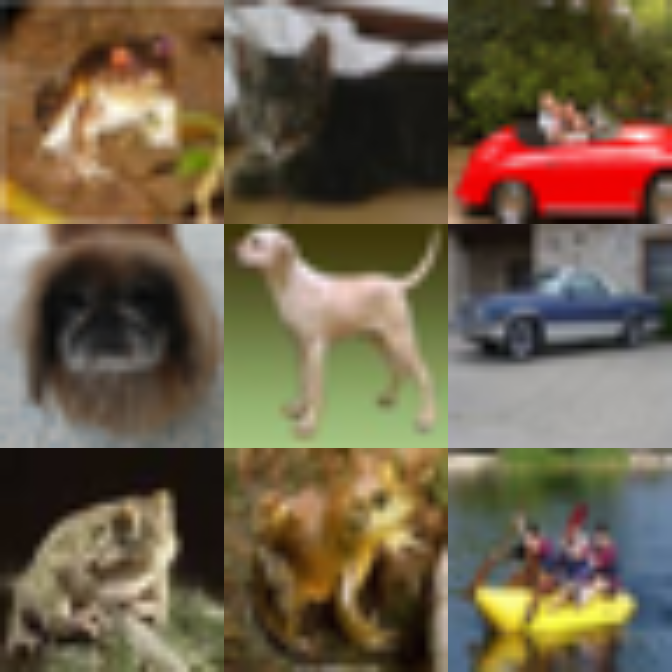

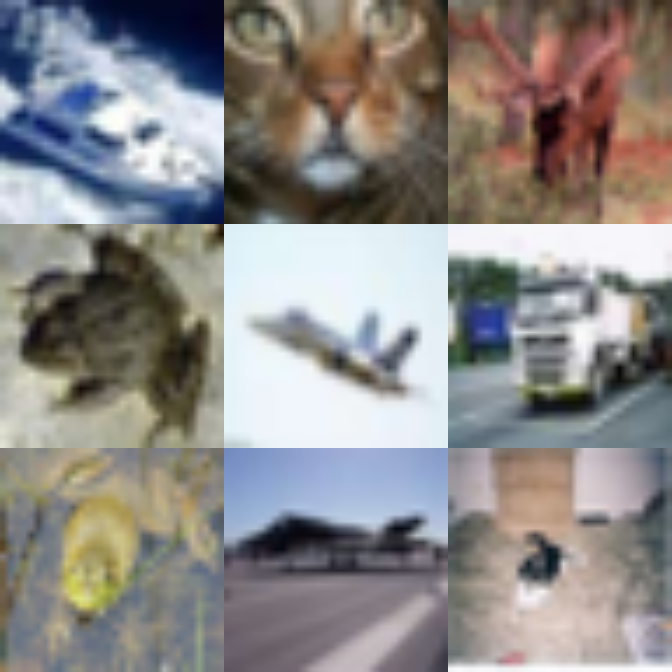

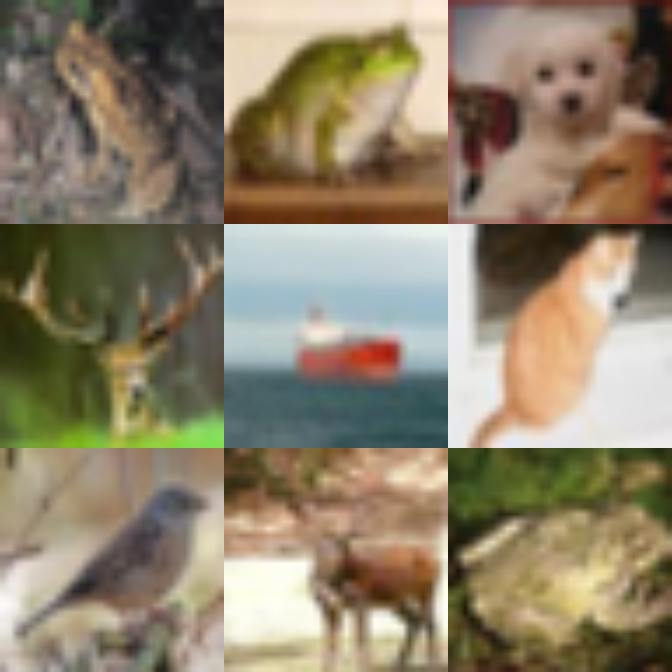

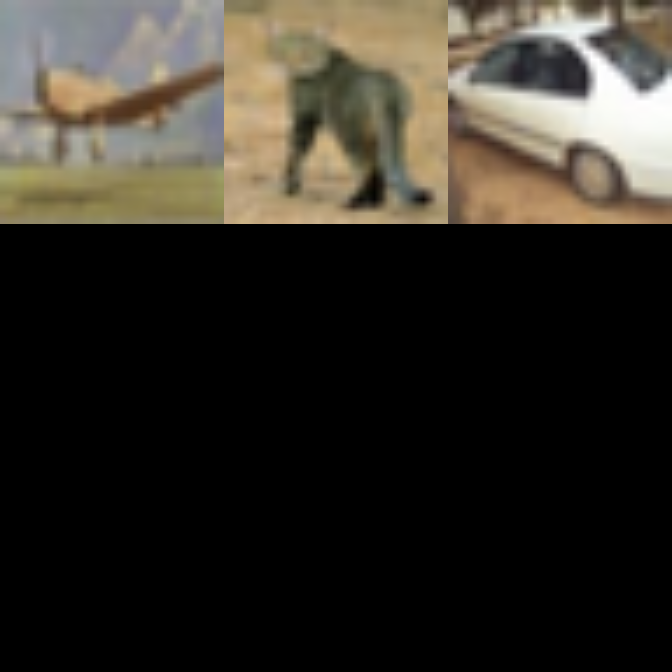

In [27]:
from imutils import build_montages
from google.colab.patches import cv2_imshow
montages = build_montages(images,(224,224),(3,3))
for montage in montages :
  cv2_imshow(montage)

## Base parameters

In [32]:
# and batch size
INIT_LR = 1e-3
EPOCHS = 25
BS = 8

In [49]:
def image_preprocessing(path,img_size):
  data = [] # has processed image
  labels = []
  for i in os.listdir(path):
    image_path = path + "/" + i
    #print(image_path)
    image_original = cv2.imread(image_path)
    #Preprocess Image
    image_processed = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image_processed = cv2.equalizeHist(image_processed)
    #image_processed = cv2.medianBlur(image_processed ,5)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    image_processed  = clahe.apply(image_processed )
    image_processed  = cv2.cvtColor(image_processed,cv2.COLOR_GRAY2RGB)
    image_processed  = cv2.resize(image_processed,(img_size,img_size))
    data.append(image_processed)
    lbl = train_df[train_df['Filename'] == i]['label'].tolist()[0]
    labels.append(lbl)

  return data,labels

In [51]:
feature,label = image_preprocessing("/content/drive/MyDrive/CIFAR10/train/train/",224)

In [52]:
len(feature),len(label)

(50000, 50000)

In [ ]:
feature= np.array(feature) / 255.0
label = np.array(label)

In [ ]:
from tensorflow.keras.utils import to_categorical